

*   https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
*   https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.datasets import load_iris

In [ ]:
data=pd.read_csv('framingham.csv')

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
#number of missing values per column
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
#the unique categories of education
data.education.unique()

array([4., 2., 1., 3.])

In [ ]:
#we have no idea about the information brought by education, so we drop it
data=data.drop('education',axis=1)

In [ ]:
data.TenYearCHD.unique()

array([0, 1])

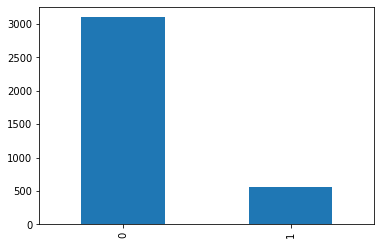

In [ ]:
data.TenYearCHD.value_counts().plot(kind='bar')
#np.sum(discrete_data.TenYearCHD==1)

imbalanced data

In [ ]:
data=pd.concat([data[data.TenYearCHD==1][:500],data[data.TenYearCHD==0][:500]])
data=data.sample(frac = 1)

In [ ]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
558,0,44,1,10.0,0.0,0,0,0,250.0,136.5,83.5,21.33,70.0,95.0,1
561,0,54,0,0.0,0.0,0,0,0,275.0,113.5,75.5,19.63,66.0,78.0,0
617,0,51,1,3.0,0.0,0,1,0,398.0,161.0,96.0,23.63,77.0,83.0,0
403,0,41,0,0.0,0.0,0,0,0,179.0,116.0,67.0,18.58,73.0,68.0,0
634,0,38,1,20.0,0.0,0,0,0,229.0,117.5,67.5,23.47,78.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0,47,1,20.0,0.0,0,0,0,237.0,130.0,78.0,19.66,80.0,75.0,0
509,0,46,1,20.0,0.0,0,0,0,218.0,115.5,62.0,23.48,65.0,77.0,0
578,1,41,1,10.0,0.0,0,0,0,210.0,121.5,82.5,23.27,78.0,89.0,0
113,0,64,0,0.0,0.0,0,1,0,282.0,158.0,105.0,24.37,75.0,71.0,0


In [ ]:

X=data.drop('TenYearCHD',axis=1)
Y=data['TenYearCHD']

In [ ]:
#we train a logit model using all the features and we see which features are significant to predict the target
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618458
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.108     
Dependent Variable: TenYearCHD       AIC:              1264.9166 
Date:               2022-12-11 21:42 BIC:              1333.6251 
No. Observations:   1000             Log-Likelihood:   -618.46   
Df Model:           13               LL-Null:          -693.15   
Df Residuals:       986              LLR p-value:      2.7507e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.5062   0.1487  3.4039 0.0007  0.2147  0.7977
age                0.0439   0.0086  5.0998 0.0000  0.0270  0.0608


In [ ]:
#we drop the features with pvalue>0.05
cols=['male','age','cigsPerDay','prevalentHyp','diabetes','diaBP','heartRate','TenYearCHD']
#please leave a comment if u find an automative way to select variables with pvalue<=0.05
X=data[cols].drop('TenYearCHD',axis=1)
Y=data['TenYearCHD']

now the data is ready, you have to implment lr & naive bayes on different splits and training sizes & compare the results

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 558 to 833
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          1000 non-null   int64  
 1   age           1000 non-null   int64  
 2   cigsPerDay    1000 non-null   float64
 3   prevalentHyp  1000 non-null   int64  
 4   diabetes      1000 non-null   int64  
 5   diaBP         1000 non-null   float64
 6   heartRate     1000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 62.5 KB


discrete inputs

In [ ]:
discrete_data=data[['male','prevalentHyp','diabetes','TenYearCHD']]


In [ ]:
discrete_data.corr()

,male,prevalentHyp,diabetes,TenYearCHD
male,1.000000,-0.039318,0.014155,0.132128
prevalentHyp,-0.039318,1.000000,0.085608,0.263181
diabetes,0.014155,0.085608,1.000000,0.105905
TenYearCHD,0.132128,0.263181,0.105905,1.000000


In [ ]:
accuracy_lr=[]
accuracy_nb=[]

In [ ]:
for i in range(5,50,5):
  lr_score=0
  nb_score=0
  for j in range(1000):
    train_data=discrete_data.sample(frac=1)#shuffle data
    train_data=pd.concat([train_data[train_data.TenYearCHD==1][:int(i/2)],train_data[train_data.TenYearCHD==0][:int(i/2)]])
    X_train=train_data.drop('TenYearCHD',axis=1)
    y_train=train_data['TenYearCHD']
    lr_model=LogisticRegression().fit(X_train,y_train)
    lr_score+=lr_model.score(X_train,y_train)
    nb_model=BernoulliNB().fit(X_train,y_train)
    nb_score+=nb_model.score(X_train,y_train)
  accuracy_lr.append(1/1000*lr_score)
  accuracy_nb.append(1/1000*nb_score)


In [ ]:
accuracy_lr

[0.8155,
 0.7319000000000009,
 0.7090714285714269,
 0.6867999999999984,
 0.6802083333333339,
 0.6695666666666686,
 0.6696470588235288,
 0.6593249999999988,
 0.6562045454545452]

In [ ]:
accuracy_nb

[0.8125,
 0.7292000000000007,
 0.7070714285714268,
 0.6851499999999988,
 0.6790416666666675,
 0.6677333333333352,
 0.6685882352941168,
 0.6587999999999988,
 0.6556590909090905]

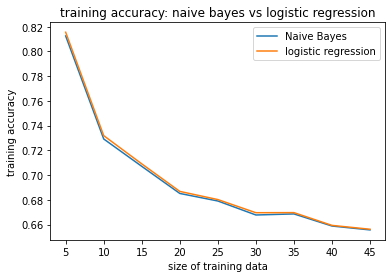

In [ ]:
index=range(5,50,5)

plt.figure()
plt.plot(index,accuracy_nb,label='Naive Bayes')
plt.plot(index,accuracy_lr,label='logistic regression')
plt.title('training accuracy: naive bayes vs logistic regression')
plt.ylabel('training accuracy')
plt.xlabel('size of training data')
plt.legend()
plt.show()

continuous inputs

In [ ]:
continuous_data=data[['age','cigsPerDay','diaBP','heartRate','TenYearCHD']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(continuous_data[['age','cigsPerDay','diaBP','heartRate']])
norm_data=scaler.transform(continuous_data[['age','cigsPerDay','diaBP','heartRate']])
norm_data

array([[-0.83280003,  0.01386201, -0.06966981, -0.49333896],
       [ 0.31493981, -0.79678188, -0.66865795, -0.82735315],
       [-0.02938214, -0.55358871,  0.86624916,  0.09118587],
       ...,
       [-1.17712198,  0.01386201, -0.14454333,  0.17468942],
       [ 1.46267965, -0.79678188,  1.54011081, -0.07582122],
       [ 0.20016583, -0.79678188,  4.16068392,  2.59629231]])

In [ ]:
continuous_data[['age','cigsPerDay','diaBP','heartRate']]=norm_data

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
continuous_data

,age,cigsPerDay,diaBP,heartRate,TenYearCHD
558,-0.832800,0.013862,-0.069670,-0.493339,1
561,0.314940,-0.796782,-0.668658,-0.827353,0
617,-0.029382,-0.553589,0.866249,0.091186,0
403,-1.177122,-0.796782,-1.305083,-0.242828,0
634,-1.521444,0.824506,-1.267646,0.174689,0
...,...,...,...,...,...
52,-0.488478,0.824506,-0.481474,0.341697,0
509,-0.603252,0.824506,-1.679450,-0.910857,0
578,-1.177122,0.013862,-0.144543,0.174689,0
113,1.462680,-0.796782,1.540111,-0.075821,0


In [ ]:
accuracy_lr=[]
accuracy_nb=[]

In [ ]:
for i in range(5,1000,100):
  lr_score=0
  nb_score=0
  for j in range(1000):
    train_data=continuous_data.sample(frac=1)#shuffle data
    train_data=pd.concat([train_data[train_data.TenYearCHD==1][:int(i/2)],train_data[train_data.TenYearCHD==0][:int(i/2)]])
    X_train=train_data.drop('TenYearCHD',axis=1)
    y_train=train_data['TenYearCHD']
    lr_model=LogisticRegression().fit(X_train,y_train)
    lr_score+=lr_model.score(X_train,y_train)
    nb_model=GaussianNB().fit(X_train,y_train)
    nb_score+=nb_model.score(X_train,y_train)
  accuracy_lr.append(1/1000*lr_score)
  accuracy_nb.append(1/1000*nb_score)


In [ ]:
accuracy_lr

[0.94825,
 0.6700288461538464,
 0.6631372549019594,
 0.6602368421052622,
 0.6592846534653463,
 0.6578789682539701,
 0.6564503311258261,
 0.6572485795454539,
 0.6577537313432822,
 0.6578926991150413]

In [ ]:
accuracy_nb

[0.9655,
 0.6785288461538457,
 0.667950980392155,
 0.664506578947368,
 0.6630346534653458,
 0.6615535714285736,
 0.660902317880793,
 0.6621747159090906,
 0.6619763681592035,
 0.6621637168141573]

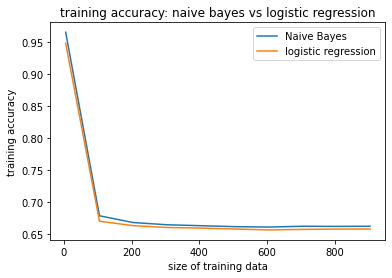

In [ ]:
index=range(5,1000,100)

plt.figure()
plt.plot(index,accuracy_nb,label='Naive Bayes')
plt.plot(index,accuracy_lr,label='logistic regression')
plt.title('training accuracy: naive bayes vs logistic regression')
plt.ylabel('training accuracy')
plt.xlabel('size of training data')
plt.legend()
plt.show()

iris dataset

In [ ]:


data=load_iris(as_frame=True).frame
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
accuracy_lr=[]
accuracy_nb=[]




for i in range(9,150,9):
  lr_score=0
  nb_score=0
  for j in range(1000):
    train_data=data.sample(frac=1)#shuffle data
    train_data=pd.concat([train_data[train_data.target==0][:int(i/3)],train_data[train_data.target==1][:int(i/3)]
                          ,train_data[train_data.target==2][:int(i/3)]])
    X_train=train_data.drop('target',axis=1)
    y_train=train_data['target']
    lr_model=LogisticRegression().fit(X_train,y_train)
    lr_score+=lr_model.score(X_train,y_train)
    nb_model=GaussianNB().fit(X_train,y_train)
    nb_score+=nb_model.score(X_train,y_train)
  accuracy_lr.append(1/1000*lr_score)
  accuracy_nb.append(1/1000*nb_score)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [ ]:
accuracy_lr

[0.9833333333333361,
 0.9777222222222265,
 0.97637037037037,
 0.9763888888888806,
 0.975933333333325,
 0.9743518518518579,
 0.974158730158735,
 0.9745972222222131,
 0.9738641975308544,
 0.9745333333333346,
 0.9740505050505182,
 0.9741018518518498,
 0.9751538461538587,
 0.9748174603174652,
 0.9749407407407271,
 0.9743402777777589]

In [ ]:
accuracy_nb

[0.9936666666666677,
 0.9796111111111149,
 0.971666666666669,
 0.9673611111111059,
 0.9629999999999901,
 0.9619629629629696,
 0.962158730158737,
 0.960499999999998,
 0.9598641975308528,
 0.9602444444444426,
 0.9600707070707142,
 0.9589537037036985,
 0.959299145299154,
 0.959412698412706,
 0.9593333333333222,
 0.9587361111111262]

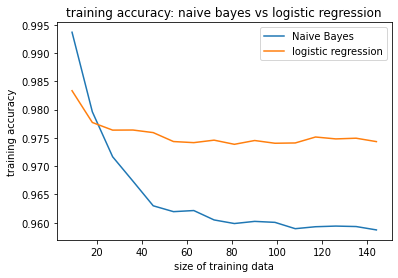

In [ ]:
index=range(9,150,9)

plt.figure()
plt.plot(index,accuracy_nb,label='Naive Bayes')
plt.plot(index,accuracy_lr,label='logistic regression')
plt.title('training accuracy: naive bayes vs logistic regression')
plt.ylabel('training accuracy')
plt.xlabel('size of training data')
plt.legend()
plt.show()